Epoch [10/100], Loss: inf
Epoch [20/100], Loss: nan
Epoch [30/100], Loss: nan
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


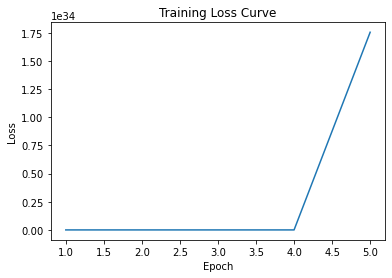

Test Loss: nan


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 加载sklearn自带的波士顿房价（回归）数据集
X, y = load_boston(return_X_y=True)

# 将数据转换为张量
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# 以指定比例将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.875, test_size=0.125, random_state=188
)

# 定义多元回归模型
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)

# 初始化模型
input_size = X_train.shape[1]
model = LinearRegressionModel(input_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 用于存储训练过程中的损失值
losses = []

# 训练模型
num_epochs = 100
for epoch in range(num_epochs):
    # 前向传播
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# 绘制损失下降曲线
plt.plot(range(1, num_epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

# 在测试集上评估模型
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = criterion(y_pred_test, y_test)
    print(f'Test Loss: {test_loss.item()}')